In [48]:
import re
import time
import math
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import re
from sklearn.model_selection import train_test_split

# Amazon Review Sentiment Analysis

In [49]:
# Load the data
amazon = pd.read_json('C:/Users/keith/Desktop/Thinkful/Patio_Lawn_and_Garden_5.json', lines=True)
 
pd.set_option('display.max_columns', None) # disables trucated columns 
pd.set_option('display.max_rows', None) # disables trucated rows


In [50]:
amazon.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B00002N674,"[4, 4]",4,"Good USA company that stands behind their products. I have had to warranty two hoses and they send replacements right out to you. I had one burst after awhile, you could see it buldge for weeks before it went so no suprises. The other one was winter related as I am bad and leave them out most of the time. Highly reccomend. Note the hundred footer is heavy and like wresting an anaconda when its time to put away, but it does have a far reach.","06 21, 2011",A1JZFGZEZVWQPY,"Carter H ""1amazonreviewer@gmail . com""",Great Hoses,1308614400
1,B00002N674,"[0, 0]",5,This is a high quality 8 ply hose. I have had good luck with Gilmour hoses in the past. A good choice in hoses.,"06 9, 2014",A32JCI4AK2JTTG,"Darryl Bennett ""Fuzzy342""","Gilmour 10-58050 8-ply Flexogen Hose 5/8-Inch by 50-Foot, Green",1402272000
2,B00002N674,"[2, 3]",4,"It's probably one of the best hoses I've ever had.Pro's:- It's good enough for most front yards, or small back yards.- It has enough flow (and with the right head) to water plants 25ft away from the nozzle, and water your garden.- It's light weight, and flexible (it does not pose as much of a problem unrolling this hose with kinks as with other hoses I've owned)- The hose is flexible, yet strong. I haven't cut the outside yet.- This hose has been in full sunlight for more than 3 months, and ...","05 5, 2012",A3N0P5AAMP6XD2,H B,Very satisfied!,1336176000
3,B00002N674,"[0, 0]",5,"I probably should have bought something a bit more flexible and less rugged since I constantly coil/uncoil it for washing cars, but that's my fault not a product fault.","07 15, 2013",A2QK7UNJ857YG,Jason,Very high quality,1373846400
4,B00002N674,"[1, 1]",5,"I bought three of these 5/8-inch Flexogen hoses--50, 75, and 100 feet--for different areas of yard around the house. After a season of use they've proven to be good hoses. Of course, it's very favorable that they don't leak. But what particularly impresses me about them is their notably light weight and flexibility, which make them a lot easier to handle than my previous hoses. The flexibility diminishes in cold weather, but a garden hose is less useful then anyway.They're not especially...","08 5, 2013",AS0CYBAN6EM06,jimmy,Good Hoses,1375660800


In [5]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13272 entries, 0 to 13271
Data columns (total 9 columns):
asin              13272 non-null object
helpful           13272 non-null object
overall           13272 non-null int64
reviewText        13272 non-null object
reviewTime        13272 non-null object
reviewerID        13272 non-null object
reviewerName      13107 non-null object
summary           13272 non-null object
unixReviewTime    13272 non-null int64
dtypes: int64(2), object(7)
memory usage: 933.3+ KB


In [19]:
amazon.isnull().sum()

asin                0
helpful             0
overall             0
reviewText          0
reviewTime          0
reviewerID          0
reviewerName      165
summary             0
unixReviewTime      0
dtype: int64

In [254]:
amazon.overall.value_counts()

5    7037
4    3384
3    1659
2     673
1     519
Name: overall, dtype: int64

In [54]:
amazon['catgry_rate'] = np.where(amazon.overall>3,0,1)
amazon.catgry_rate.value_counts()

0    10421
1     2851
Name: catgry_rate, dtype: int64

In [256]:
amazon['reviewTime'] = pd.to_datetime(amazon.reviewTime)

In [32]:
review_lenth = []
for i in amazon.reviewText:
     
         review_lenth.append(len(i))
amazon['review_length'] = review_lenth

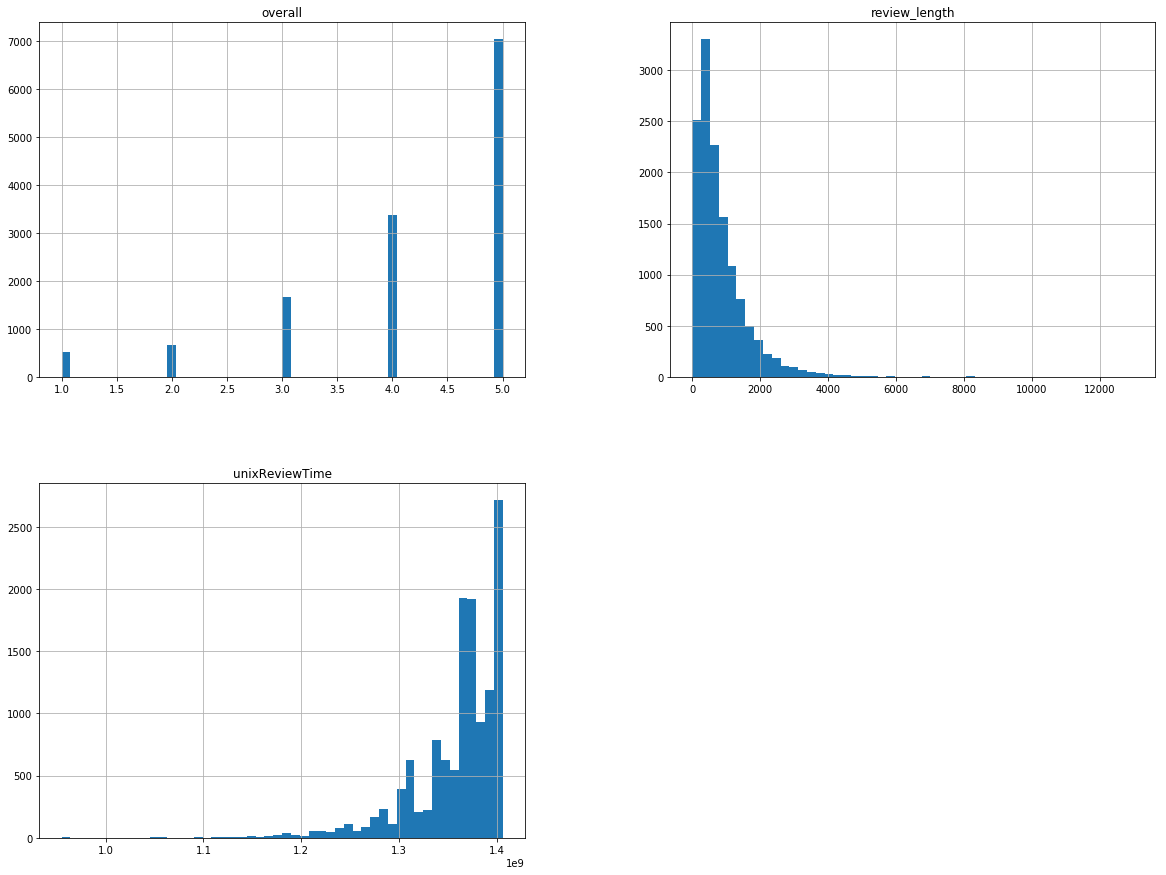

In [33]:
amazon.hist(bins=50,figsize=(20,15))
plt.show()

In [66]:
X= amazon.reviewText
Y= amazon.catgry_rate

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)


In [67]:
# Vectorize the list of words 
from sklearn.feature_extraction.text import TfidfVectorizer 
cv = TfidfVectorizer(stop_words='english',min_df=1) 

X_traincv = cv.fit_transform(X_train)
X_testcv = cv.transform(X_test)


In [68]:
# Create balanced classes for the training set

import imblearn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=20)
X_traincvb, y_trainb = ros.fit_sample(X_traincv, y_train)

In [69]:
X_traincvb.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Naive Bayes

In [72]:
# Instatiate the model

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_traincvb , y_trainb)



y_pred = mnb.predict(X_testcv) 
print(mnb.score( X_testcv , y_test))

from sklearn.model_selection import cross_val_score
print(cross_val_score(mnb,  X_testcv , y_test, cv=5))

0.7220338983050848
[0.79096045 0.79096045 0.79096045 0.79096045 0.79096045]


In [73]:
# Confusion matrix
print("Consfusion Matrix")
print(pd.crosstab(y_pred, y_test))
print()

# Classification report
print("Classification Report")
from sklearn.metrics import classification_report

target_names = ['pos','neg']
print(classification_report(y_test ,y_pred, target_names=target_names))

Consfusion Matrix
catgry_rate     0    1
row_0                 
0            1528  166
1             572  389

Classification Report
              precision    recall  f1-score   support

         pos       0.90      0.73      0.81      2100
         neg       0.40      0.70      0.51       555

   micro avg       0.72      0.72      0.72      2655
   macro avg       0.65      0.71      0.66      2655
weighted avg       0.80      0.72      0.74      2655



AUC: 0.653


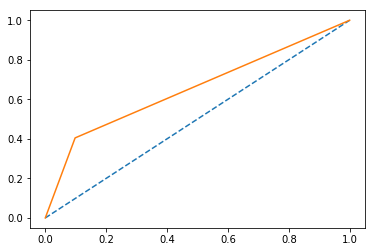

In [74]:
auc = roc_auc_score(y_pred, y_test)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
 
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr ) 
pyplot.show()

In [75]:
roc_curve(y_pred, y_test)

(array([0.        , 0.09799292, 1.        ]),
 array([0.        , 0.40478668, 1.        ]),
 array([2, 1, 0]))